In [ ]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# --- Load Dataset ---
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Regression target

In [ ]:
# --- Preprocessing ---
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [ ]:
# --- Exploratory Data Analysis (EDA) ---
print("Data Summary:")
print(df.describe())

Data Summary:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.

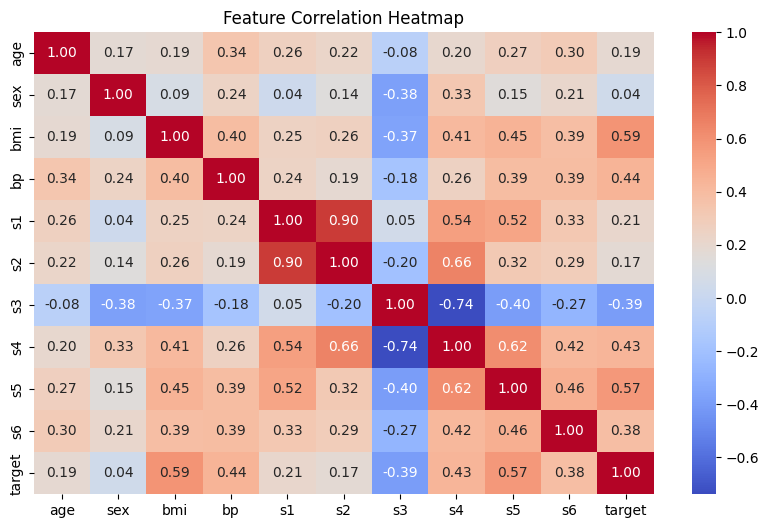

In [ ]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# --- Split Data ---
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# --- Model 1: Linear Regression ---
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

In [ ]:
# --- Model 2: Random Forest Regressor ---
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

In [ ]:
# --- Results Summary ---
print("\nModel Evaluation:")
print(f"Linear Regression -> RMSE: {lr_rmse:.2f}, R²: {lr_r2:.2f}")
print(f"Random Forest     -> RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")


Model Evaluation:
Linear Regression -> RMSE: 53.85, R²: 0.45
Random Forest     -> RMSE: 54.33, R²: 0.44


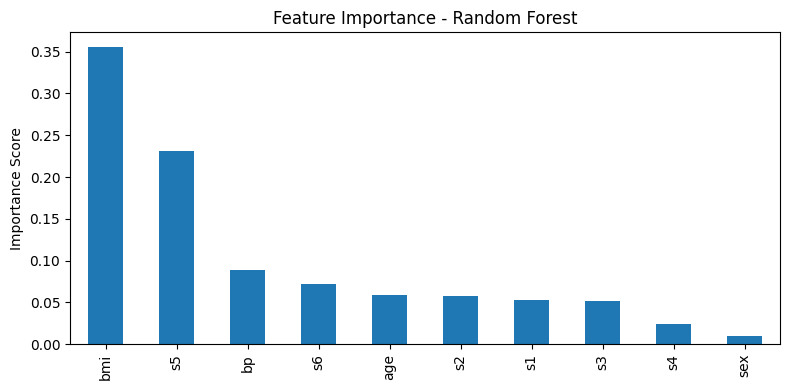

In [ ]:
# --- Feature Importance (Random Forest) ---
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 4))
feature_importance.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()

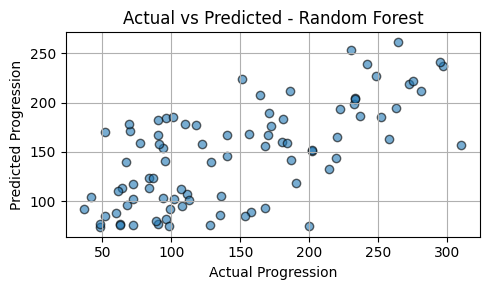

In [ ]:
# --- Actual vs Predicted Plot ---
plt.figure(figsize=(5, 3))
plt.scatter(y_test, rf_preds, alpha=0.6, edgecolors='k')
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.title("Actual vs Predicted - Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()

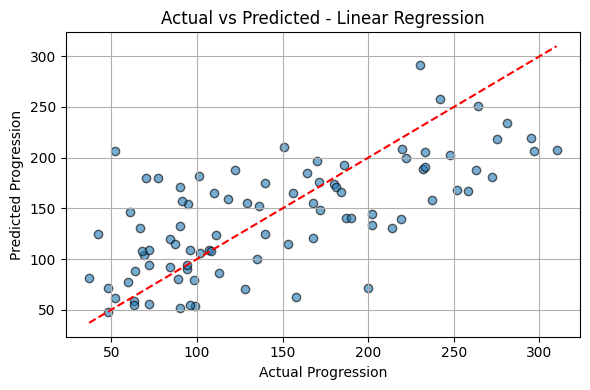

In [ ]:
#Actual vs Predicted Plot - Linear Regression
plt.figure(figsize=(5, 4))
plt.scatter(y_test, lr_preds, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.title("Actual vs Predicted - Linear Regression")
plt.grid(True)
plt.tight_layout()
plt.show()

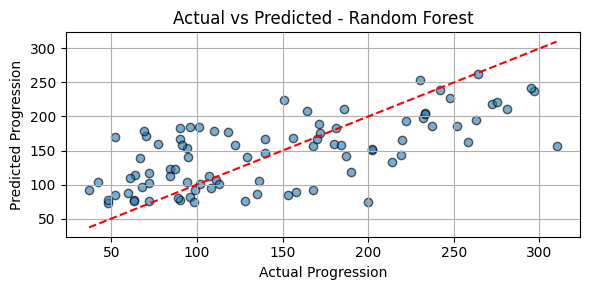

In [ ]:
# Actual vs Predicted Plot - Random Forest
plt.figure(figsize=(6, 3))
plt.scatter(y_test, rf_preds, alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.title("Actual vs Predicted - Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()